In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [83]:
def error_score(ytrue, ypred):
    return (sum(ypred != ytrue)*100.0)/len(ytrue)

### Loading and Splitting the Data

In [84]:
data = pd.read_table("data/Dbig.txt", sep=" ", header=None, names=["X1", "X2", "Y"])
print(data.head())

         X1        X2  Y
0 -1.499372  0.976384  1
1 -1.499224 -0.517983  1
2 -1.498880 -1.271624  1
3 -1.498383  1.456647  1
4 -1.498293 -1.290862  1


In [85]:
data_train = data.sample(frac=0.8192, random_state=1234)
print("Train data shape ",data_train.shape)
data_test = data.drop(data_train.index).reset_index(drop=True)
data_train.reset_index(drop=True, inplace=True)
print("Test data shape ",data_test.shape)

split_count = [32,128,512,2048,8192]
cols = list(data.columns)
data_train_n = {}
for i in split_count:
    data_train_n[i] = data_train.sample(frac=(i/8192), random_state=1234).reset_index(drop=True)

Train data shape  (8192, 3)
Test data shape  (1808, 3)


### Training the Decision Tree and calculating Error on test set

In [88]:
dt_sk_n = {}
error_n  = {}
for i in split_count:
    X, y = data_train_n[i].loc[:,cols[:-1]], data_train_n[i].loc[:,cols[-1]]
    dt_sk_n[i] = DecisionTreeClassifier()
    dt_sk_n[i].fit(X, y)
    X_test, y_test = data_test.loc[:,cols[:-1]], data_test.loc[:,cols[-1]]
    error_n[i] = error_score(y_test, dt_sk_n[i].predict(X_test))

In [91]:
for keys, value in dt_sk_n.items():
    print(f"For n= {keys} training samples,\tnodes= {value.tree_.node_count}")

print()
for keys, value in error_n.items():
    print(f"For n= {keys} training samples,\ttest error= {round(value,2)}%")

For n= 32 training samples,	nodes= 9
For n= 128 training samples,	nodes= 33
For n= 512 training samples,	nodes= 53
For n= 2048 training samples,	nodes= 107
For n= 8192 training samples,	nodes= 223

For n= 32 training samples,	test error= 10.73%
For n= 128 training samples,	test error= 6.91%
For n= 512 training samples,	test error= 4.42%
For n= 2048 training samples,	test error= 3.43%
For n= 8192 training samples,	test error= 1.38%


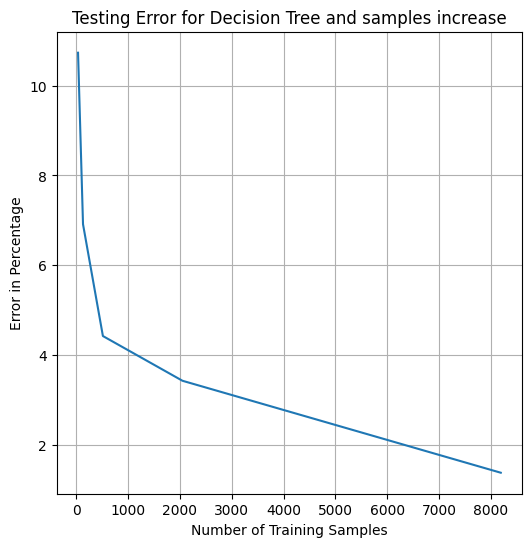

In [92]:
fig = plt.figure(num=None, figsize=(6, 6))
plt.plot(list(error_n.keys()),list(error_n.values()))
plt.ylabel("Error in Percentage")
plt.xlabel("Number of Training Samples")
plt.title(f"Testing Error for Decision Tree and samples increase")
plt.grid(axis='both')
plt.show()

### Plotting the decision boundary and the training samples over it

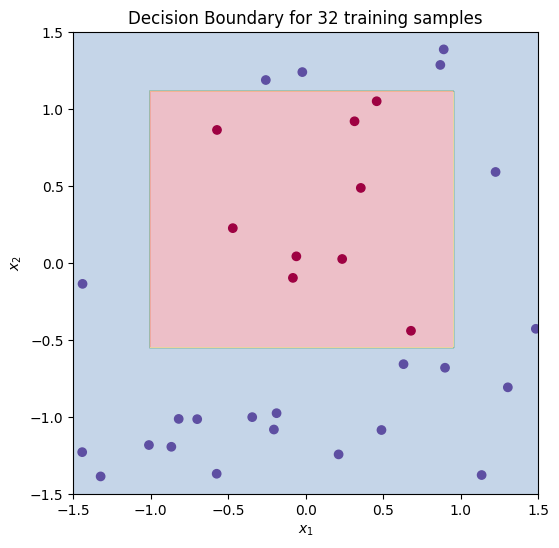

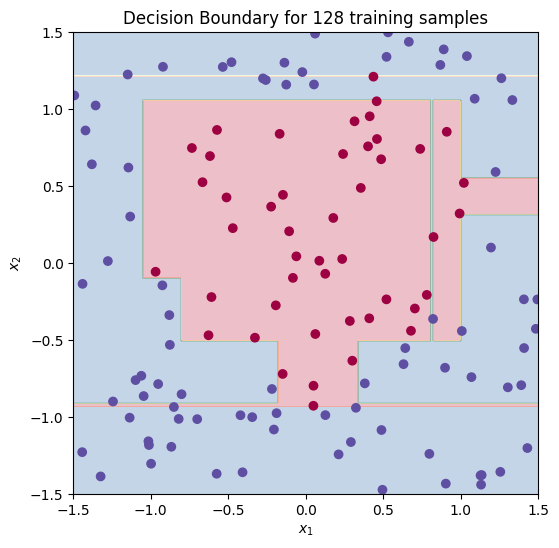

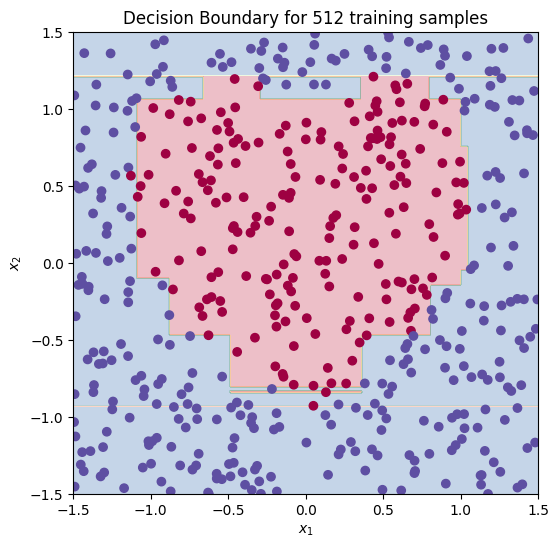

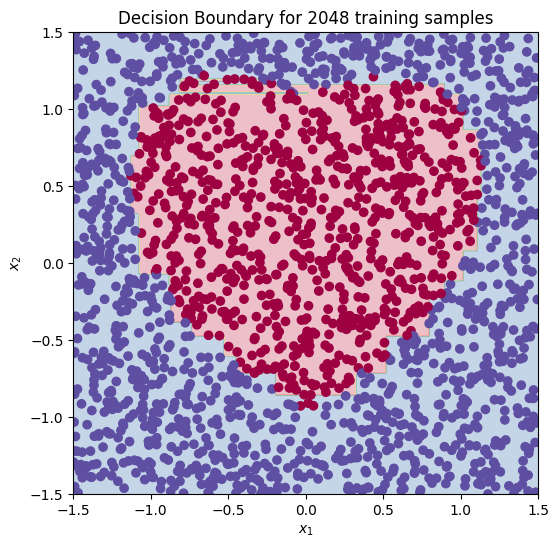

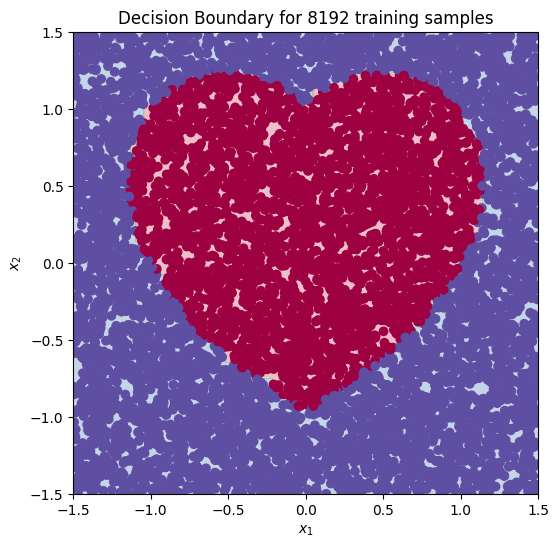

In [9]:
for i in split_count:
    X, y = data_train_n[i].loc[:,cols[:-1]], data_train_n[i].loc[:,cols[-1]]
    n = 400
    x1 = np.linspace(-1.5, 1.5, n)
    x2 = np.linspace(-1.5, 1.5, n)

    x = np.array(np.meshgrid(x1,x2)).reshape(2,-1)
    x = pd.DataFrame(x.T)
    x.columns = ["X1","X2"]
    decision_space = np.asarray(dt_clf_n[i].predict(x))
    decision_space = decision_space.reshape(400,400)
                
    fig = plt.figure(num=None, figsize=(6, 6))
    plt.contourf(x1, x2, decision_space, alpha=0.3, cmap='Spectral')
    plt.scatter(X['X1'],X['X2'],c=y,cmap='Spectral')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(f"Decision Boundary for {i} training samples")
    plt.show()